### **双边滤波**

* 双边滤波综合考虑图像的空域信息和图像像素灰度值相似性，可以在保留区域信息的基础上实现噪声的去除、局部边缘的平滑

* 双边滤波会对高幅度的波动信号起到平滑的作用，同时保留大幅度的信号波动，进而实现保留图像中边缘信息的效果

* 双边滤波器是空域滤波器和值域滤波器的结合，分别考虑空域信息和值域信息，使得滤波时距离边缘较远的像素值不会对边缘像素值影响太大

* 函数的第三个参数越大，像素邻域内有越多的颜色被混合在一起，产生较大的颜色混合区域；第四个参数越大，表明越远的像素会相互影响，使得更大邻域中有足够相似的像素获取相同的颜色

* 一般将第三个参数和第四个参数设置为相同的值，小于10时滤波作用较弱，大于150时滤波效果非常强烈，使图像看起来有卡通效果

* 实时系统中使用，滤波器的直径一般设置为5，离线处理时一般设置为9

In [21]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [22]:
# 读取图像并判断是否读取成功
image1 = cv.imread(rootpath +'face1.png', cv.IMREAD_ANYCOLOR)[:,:,[2,1,0]]
if image1 is None:
    print('Failed to read face1.png')
    sys.exit

image2 = cv.imread(rootpath +'face2.png', cv.IMREAD_ANYCOLOR)[:,:,[2,1,0]]
if image2 is None:
    print('Failed to read face2.png')
    sys.exit

In [23]:
# 验证不同滤波器直径的滤波效果
res1 = cv.bilateralFilter(image1, 9, 50, 25 / 2)
res2 = cv.bilateralFilter(image1, 25, 50, 25 / 2)

In [24]:
# 验证不同标准差的滤波效果
res3 = cv.bilateralFilter(image2, 9, 9, 9)
res4 = cv.bilateralFilter(image2, 9, 200, 200)

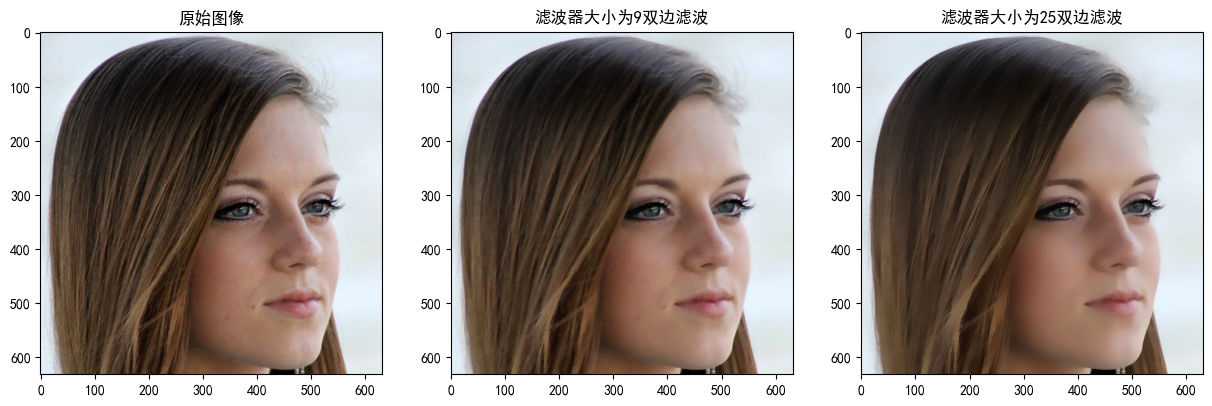

In [25]:
# 展示结果
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('原始图像')
plt.imshow(image1)
plt.subplot(1, 3, 2)
plt.title('滤波器大小为9双边滤波')
plt.imshow(res1)
plt.subplot(1, 3, 3)
plt.title('滤波器大小为25双边滤波')
plt.imshow(res2)

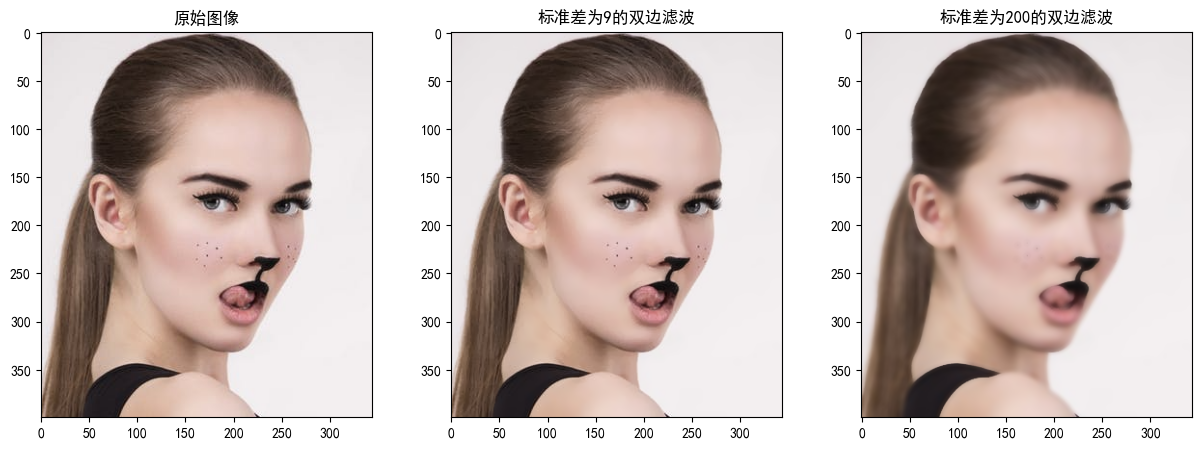

In [26]:
# 展示结果
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('原始图像')
plt.imshow(image2)
plt.subplot(1, 3, 2)
plt.title('标准差为9的双边滤波')
plt.imshow(res3)
plt.subplot(1, 3, 3)
plt.title('标准差为200的双边滤波')
plt.imshow(res4)

滤波器直径越大，滤波效果越明显；标准差越大，滤波效果越明显，双边滤波也能对人脸起到美颜的效果